韦武 SY2303523

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

data = pd.read_excel(r"C:\Users\34903\Desktop\结课\研1\[课程]\人工智能\大作业\EM算法\人工智能.xlsx", index_col = '序号')

In [2]:
def gmm(student_num, male_num, male_m, female_m, male_var, female_var):
    p_male = male_num/student_num
    p_female = 1-p_male

    # Assume that heights of boys and girls obey normal distribution respectively 
    n_1 = lambda x: math.exp(-(x-male_m)**2/(2*male_var**2))/(male_var*(2*math.pi)**0.5)
    n_2 = lambda x: math.exp(-(x-female_m)**2/(2*female_var**2))/(female_var*(2*math.pi)**0.5)

    return p_male, p_female, n_1, n_2

In [3]:
# Initialize parameters
student_num = len(data)
count = 0 
error = 1
end_condition = 0.5 # Error end condition

# Expectation-maximization
# The 1st step
p_male, p_female, n_1, n_2 = gmm(student_num, 60, 173, 163, 2, 2)

# Loop
while(count <= 10 and error >= end_condition):
    count += 1
    class_result = []
    male_height = []
    female_height = []
    male_num = 0
    
    # E-step
    for i in data['身高(cm)']:
        
        P_male = n_1(i)*p_male/(n_1(i)*p_male + n_2(i)*p_female)  # probability it's a boy's height
        P_female = n_2(i)*p_female/(n_1(i)*p_male + n_2(i)*p_female)  # probability it's a girl's height
        
        if P_male >= P_female:
            class_result.append('male')
        else:
            class_result.append('female')
    
    # M-step
    male_num = class_result.count('male')
    female_num = class_result.count('female')
    
    for j in range(student_num):
        if class_result[j] == 'male':
            male_height.append(data['身高(cm)'][j+1])
        else:
            female_height.append(data['身高(cm)'][j+1])
    
    # Calculate error
    if count >= 2:
        error = (np.mean(male_height) - male_m)**2 + (np.mean(female_height) - female_m)**2
    
    # Calculate means and variations
    male_m = np.mean(male_height)
    female_m = np.mean(female_height)
    
    male_var = np.var(male_height)**0.5
    female_var = np.var(female_height)**0.5
    
    # The next loop
    p_male, p_female, n_1, n_2 = gmm(student_num, male_num, male_m, female_m, male_var, female_var)

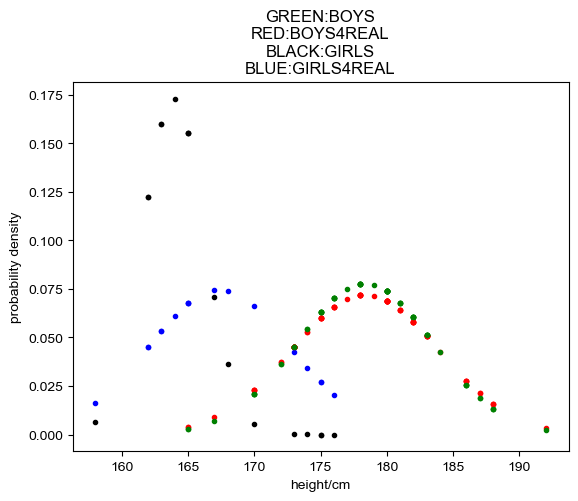

In [4]:
# Validate
real_male_m = np.mean(data[data['性别(M/F)'] == 'M']['身高(cm)'])
real_male_var = np.var(data[data['性别(M/F)'] == 'M']['身高(cm)'])**0.5

real_female_m = np.mean(data[data['性别(M/F)'] == 'F']['身高(cm)'])
real_female_var = np.var(data[data['性别(M/F)'] == 'F']['身高(cm)'])**0.5

# Real GMM
N1_real = lambda x: math.exp(-(x-real_male_m)**2/(2*real_male_var**2))/(real_male_var*(2*math.pi)**0.5)
N2_real = lambda x: math.exp(-(x-real_female_m)**2/(2*real_female_var**2))/(real_female_var*(2*math.pi)**0.5)

# Train
N1_mock = lambda x: math.exp(-(x-male_m)**2/(2*male_var**2))/(male_var*(2*math.pi)**0.5)
N2_mock = lambda x: math.exp(-(x-female_m)**2/(2*female_var**2))/(female_var*(2*math.pi)**0.5)

fig = plt.figure()
plt.rcParams['font.sans-serif'] = ['Arial']
plt.title('GREEN:BOYS\nRED:BOYS4REAL\nBLACK:GIRLS\nBLUE:GIRLS4REAL')
plt.xlabel('height/cm')
plt.ylabel('probability density')

male_height_ = data[data['性别(M/F)'] == 'M']['身高(cm)']
female_height_ = data[data['性别(M/F)'] == 'F']['身高(cm)']

for i in range(1, len(data)+1):
    if data['性别(M/F)'][i] == 'M':
        plt.plot(male_height_[i], N1_real(male_height_[i]),color = 'r', marker = '.')
        plt.plot(male_height_[i], N1_mock(male_height_[i]),color = 'green', marker = '.')
    if data['性别(M/F)'][i] == 'F':
        plt.plot(female_height_[i], N2_real(female_height_[i]),color = 'b', marker = '.')
        plt.plot(female_height_[i], N2_mock(female_height_[i]),color = 'black', marker = '.')